# steps

In [1]:
# reading images
#converting to grayscale
#resizing to 100*100
#flatten 1,10000

In [2]:
import cv2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as imgmodule 

from glob import glob
femalepath=glob('./output_crop/cropfemale/*.png')
print(len(femalepath))
malepath=glob('./output_crop/cropmale/*.png')
allpath=femalepath+malepath

df=pd.DataFrame(allpath,columns=['path'])
df.head()
def getsize(path):
        #print("current path:",path)
        return imgmodule.open(path).size[0]
df['size']=df['path'].apply(getsize)
dfnew=df[df['size']>58]
dfnew.head()
# create a gender column
def gender(path):
    #print(path)
    try:
        #print("inside try")
        #print(path.split('_')[-2].split('\\')[-1])
        return str(path.split('_')[-2].split('\\')[-1])
    except:
        None
        
dfnew['gender']=dfnew['path'].apply(gender)

print(dfnew['size'].min())

3580
81


C:\Users\md.sakib\AppData\Local\Temp\ipykernel_19084\3245555204.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['gender']=dfnew['path'].apply(gender)


In [4]:
dfnew.head()

,path,size,gender
0,./output_crop/cropfemale\female_0.png,273,female
1,./output_crop/cropfemale\female_1.png,182,female
2,./output_crop/cropfemale\female_100.png,182,female
3,./output_crop/cropfemale\female_1003.png,182,female
4,./output_crop/cropfemale\female_1008.png,81,female


In [5]:
# reading images
#converting to grayscale
#resizing to 100*100
#flatten 1,10000

In [6]:
path_to_resize=df['path'][0]
img=cv2.imread(path_to_resize)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
size=gray.shape[0]
if size>=100:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)#SHRINK
else:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)#ENLARGE
flat_img=gray_re.flatten()

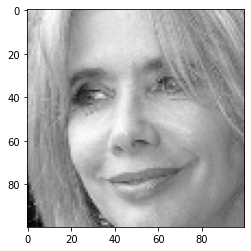

In [7]:
plt.imshow(gray_re,cmap='gray')

In [8]:
# put above computation inside function
def resize(path_to_resize):
    #df['path'][0]
    img=cv2.imread(path_to_resize)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    size=gray.shape[0]
    if size>=100:
        gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)#SHRINK
    else:
        gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)#ENLARGE
    return gray_re.flatten()

In [9]:
resize(dfnew['path'][0])

array([188, 180, 184, ..., 120, 117, 111], dtype=uint8)

In [10]:
dfnew.head()

,path,size,gender
0,./output_crop/cropfemale\female_0.png,273,female
1,./output_crop/cropfemale\female_1.png,182,female
2,./output_crop/cropfemale\female_100.png,182,female
3,./output_crop/cropfemale\female_1003.png,182,female
4,./output_crop/cropfemale\female_1008.png,81,female


In [11]:
dfnew['structure size']=df['path'].apply(resize)

C:\Users\md.sakib\AppData\Local\Temp\ipykernel_19084\3381951105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['structure size']=df['path'].apply(resize)


In [12]:
dfnew.head()

,path,size,gender,structure size
0,./output_crop/cropfemale\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,./output_crop/cropfemale\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,./output_crop/cropfemale\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,./output_crop/cropfemale\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./output_crop/cropfemale\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [13]:
# new df
df1=dfnew['structure size'].apply(pd.Series)
print(df1.head())
# EACH IMAGE 1000 PIXEL VALUE 100*100

   0     1     2     3     4     5     6     7     8     9     ...  9990  \
0   188   180   184   188   173   179   192   178   216   219  ...   109   
1    32    24    32    27    29    29    29    32    36    30  ...    58   
2    22    30    39    36    30    61    11    17    10    19  ...   156   
3    35    35    35    35    35    35    35    35    35    35  ...    75   
4    86    86    71    54    45    49    33    20    18    23  ...    35   

   9991  9992  9993  9994  9995  9996  9997  9998  9999  
0   111   115   116   122   116   119   120   117   111  
1    47    27    33    22    28    22    36    62    17  
2   171   177   186   176   185   186   190   177   177  
3    82    90    92    86    70    89    84    84    74  
4    34    32    32    30    32    34    34    33    30  

[5 rows x 10000 columns]


In [14]:
df2=pd.concat((dfnew['gender'],df1),axis=1)
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


In [ ]:
'''
Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. '''

In [16]:
import pickle
pickle.dump(df2,open('./output_crop/dataframe_images_100_100.pickle','wb'))

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5458 entries, 0 to 6053
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.3+ MB


In [18]:
#checking missing values/records
df2.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [ ]:
# data preprocessing
#1. removing null values.
#2. normalization minmax sacalling 

# Min max scalling.
## Xnorm = $\frac {x - minValue} { maxValue - minValue}$

In [65]:
print(df.iloc[:,1:].head(5))
print(df.iloc[:,0].head(5))

   size
0   273
1   182
2   182
3   182
4    81
0       ./output_crop/cropfemale\female_0.png
1       ./output_crop/cropfemale\female_1.png
2     ./output_crop/cropfemale\female_100.png
3    ./output_crop/cropfemale\female_1003.png
4    ./output_crop/cropfemale\female_1008.png
Name: path, dtype: object


In [31]:
dfnew.head()

,path,size,gender,structure size
0,./output_crop/cropfemale\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,./output_crop/cropfemale\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,./output_crop/cropfemale\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,./output_crop/cropfemale\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./output_crop/cropfemale\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [66]:
# split the data
x=df2.iloc[:,1:].values # independent variable
y=df2.iloc[:,0].values # dependent variable

In [67]:
x.shape

(5458, 10000)

In [68]:
print(x)
print(y)

[[188 180 184 ... 120 117 111]
 [ 32  24  32 ...  36  62  17]
 [ 22  30  39 ... 190 177 177]
 ...
 [ 25  25  26 ...  30  31  34]
 [ 21  27  31 ...  20  22  25]
 [  4   3   2 ...  90  90  93]]
['female' 'female' 'female' ... 'male' 'male' 'male']


In [69]:
x.min();x.max()

255

In [70]:
xnorm=x/x.max()

In [71]:
xnorm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.09803922, 0.09803922, 0.10196078, ..., 0.11764706, 0.12156863,
        0.13333333],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [72]:
y.min();y.max()

'male'

In [73]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [74]:
# label encoding the string to integer.
#female =1 and male=0
y_norm=np.where(y=='female',1,0)
print(y_norm)


[1 1 1 ... 0 0 0]


In [75]:
y_norm

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
#saving xnorm and ynorm data into file.
np.savez('./output_crop/data_10000_norm.npz',xnorm,y_norm)